In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task: Determine the eligibility for granting Home loan. Objective of this case study is: 1.   To understand the patterns in the data. 2.   How to Handle the categorical features. 3. How to deal with missing data. 4. Feature Engineering 5. Finding the most important features while taking the decision of granting a loan application. 6. Understanding the Normalization and standardisation of the data.

In [ ]:
data=pd.read_csv('loan.csv')

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
tdf=pd.DataFrame({'Feature1':[1,2,3],
                 'Feature2':[4,5,6]})
tdf

,Feature1,Feature2
0,1,4
1,2,5
2,3,6


In [ ]:
tdf.Feature1

0    1
1    2
2    3
Name: Feature1, dtype: int64

In [ ]:
tdf['Feature1']

0    1
1    2
2    3
Name: Feature1, dtype: int64

In [ ]:
tdf['Feature2']

0    4
1    5
2    6
Name: Feature2, dtype: int64

In [ ]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## analyzing missing values

In [ ]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
cat_columns=list(data.dtypes[data.dtypes=='object'].index)
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
cat_columns.remove('Loan_Status')

In [ ]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
target='Loan_Status'

In [ ]:
num_columns=list(data.dtypes[data.dtypes!='object'].index)
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
# analysis of target variable

In [ ]:
data.shape

(614, 12)

In [ ]:
data[target].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
# P[randomly select a person , chances his loan will be rejected]

In [ ]:
422/(422+192)

0.6872964169381107

In [ ]:
data[target].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [ ]:
## Approval Rate ~ 69%, 40%, 56%, 10%
## Rejection Rate ~ 31%

In [ ]:
target

'Loan_Status'

<Axes: xlabel='Loan_Status', ylabel='count'>

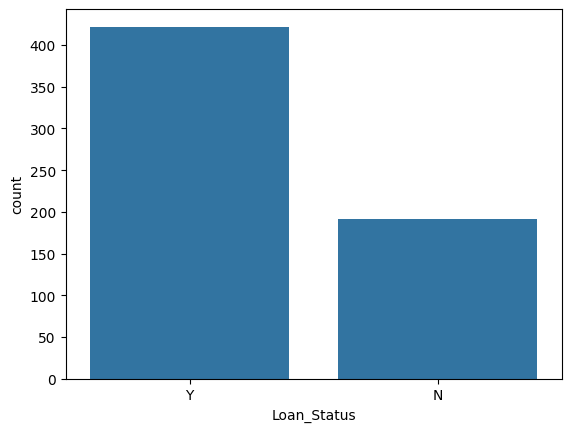

In [ ]:
# let's see it visually
sns.countplot(data=data,x=target)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


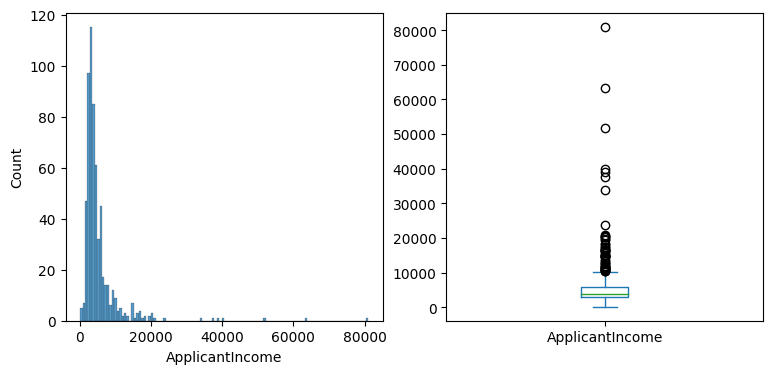

In [ ]:
# income of the applicant
plt.subplot(121)
sns.histplot(data['ApplicantIncome'])

plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(9,4))
#sns.boxplot(data['ApplicantIncome'],figsize=(9,4))
plt.show()

In [ ]:
data[['ApplicantIncome','Loan_Status']]

,ApplicantIncome,Loan_Status
0,5849,Y
1,4583,N
2,3000,Y
3,2583,Y
4,6000,Y
...,...,...
609,2900,Y
610,4106,Y
611,8072,Y
612,7583,Y


In [ ]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [ ]:
# the difference between means above is it significant to conclude that loan status depends upon applicant income

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
data[data[target]=='N']['ApplicantIncome']
data[data[target]=='Y']['ApplicantIncome']

0      5849
2      3000
3      2583
4      6000
5      5417
       ... 
608    3232
609    2900
610    4106
611    8072
612    7583
Name: ApplicantIncome, Length: 422, dtype: int64

In [ ]:
## H0 : means are same,  ApplicantIncome is bad predictor of loan_status
## HA : means are diff, ApplicantIncome is good predictor of loan_status
alpha = 0.05
t_stat,p_value=ttest_ind(data[data[target]=='N']['ApplicantIncome']
                        ,data[data[target]=='Y']['ApplicantIncome'])
print(p_value)

if(p_value<alpha):
  print('Reject H0: ", "means are diff, ApplicantIncome is good predictor of loan_status')
else:
  print('Failed to reject H0,means are diff, ApplicantIncome is good predictor of loan_status')

0.907287812130518
Failed to reject H0,means are diff, ApplicantIncome is good predictor of loan_status


In [ ]:
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
def feture_selection_ttest(data=data,col_name='ApplicantIncome'):
  alpha = 0.05
  t_stat,p_value=ttest_ind(data[data[target]=='N']['ApplicantIncome']
                        ,data[data[target]=='Y']['ApplicantIncome'])
  print(p_value)

  if(p_value<alpha):
    print(f'{col_name} is good predictor of loan_status, Reject H0:')
  else:
    print(f'{col_name} is good predictor of loan_status,Failed to reject H0')




In [ ]:
feture_selection_ttest(col_name='ApplicantIncome')

0.907287812130518
ApplicantIncome is good predictor of loan_status,Failed to reject H0


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data['Credit_History'].value_counts() #categorical variable

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
pd.crosstab(data['Credit_History'],data[target])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [ ]:
pd.crosstab(data['Credit_History'],data[target],normalize='index')

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


In [ ]:
from scipy.stats import chi2_contingency #chisquare

In [ ]:
# H0 : Credit_History is a bad perdictor of loan_status
# HA : Credit_History is a good perdictor of loan_status

alpha=0.05
_,p_value,_,_=chi2_contingency(pd.crosstab(data['Credit_History'],data[target]))
print(np.round(p_value))

# p_value <<<<< alpha
# Reject H0; Credit_History is a good perdictor of loan_status

0.0


In [ ]:
pd.crosstab(data['Gender'],data[target])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
def feature_selection_chi2_test(data=data,col_name='Gender'):
  alpha=0.05
  _,p_value,_,_=chi2_contingency(pd.crosstab(data[col_name],data[target]))
  print(p_value)

  if p_value<alpha:
    print(f'{col_name} is a good predictor of loan status')
  else:
    print(f'{col_name} is a bad predictor of loan status')

In [ ]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
feature_selection_chi2_test(col_name='Gender')

0.7086529816451106
Gender is a bad predictor of loan status


In [ ]:
feature_selection_chi2_test(col_name='Married')

0.03439381301579988
Married is a good predictor of loan status


In [ ]:
feature_selection_chi2_test(col_name='Dependents')

0.3678506740863211
Dependents is a bad predictor of loan status


In [ ]:
feature_selection_chi2_test(col_name='Education')

0.04309962129357355
Education is a good predictor of loan status


In [ ]:
feature_selection_chi2_test(col_name='Self_Employed')

1.0
Self_Employed is a bad predictor of loan status


In [ ]:
feature_selection_chi2_test(col_name='Property_Area')

0.0021360187811644937
Property_Area is a good predictor of loan status


In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:

feture_selection_ttest(col_name='ApplicantIncome')

0.907287812130518
ApplicantIncome is good predictor of loan_status,Failed to reject H0


In [ ]:

feture_selection_ttest(col_name='CoapplicantIncome')

0.907287812130518
CoapplicantIncome is good predictor of loan_status,Failed to reject H0


## Create New Features

In [ ]:
data['total income']=data['ApplicantIncome']+data['CoapplicantIncome']

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [ ]:
feture_selection_ttest(col_name='total income')

0.907287812130518
total income is good predictor of loan_status,Failed to reject H0


In [ ]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data['Loan_Amount_Term']=(data['Loan_Amount_Term']/12)

In [ ]:
data['Loan_Amount_Term'].value_counts()

30.0    512
15.0     44
40.0     15
25.0     13
20.0      4
7.0       4
10.0      3
5.0       2
3.0       2
1.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0


In [ ]:
data['loan_amount_per_year']=(data['LoanAmount']/data['Loan_Amount_Term'])

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000


In [ ]:
data['EMI']=(data['loan_amount_per_year']*1000)/12 #EMI

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667


In [ ]:
(data['total income']*0.3 > data['EMI']).astype(int)

0      0
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Length: 614, dtype: int64

In [ ]:
data['able_to_pay_EMI']=(data['total income']*0.3 > data['EMI']).astype(int)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI,able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [ ]:
pd.crosstab(data['Loan_Status'],data['able_to_pay_EMI'])

able_to_pay_EMI,0,1
Loan_Status,,
N,19,173
Y,21,401


In [ ]:
  feature_selection_chi2_test(col_name='able_to_pay_EMI')

0.03455011506195388
able_to_pay_EMI is a good predictor of loan status


## missing values analysis

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI,able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [ ]:
data.isnull().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed           32
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History          50
Property_Area            0
Loan_Status              0
total income             0
loan_amount_per_year    36
EMI                     36
able_to_pay_EMI          0
dtype: int64

In [ ]:
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
cat_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
data['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [ ]:
data['Credit_History']=data['Credit_History'].fillna(2)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI,able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [ ]:
data.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Self_Employed']=data['Self_Employed'].fillna('other')

In [ ]:
data.Self_Employed.unique()

array(['No', 'Yes', 'other'], dtype=object)

## for numerical features

In [ ]:
num_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
data[num_columns].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
dtype: int64

In [ ]:
# median imputation for numerical columns

from sklearn.impute import SimpleImputer

In [ ]:
si=SimpleImputer(strategy='median')

In [ ]:
# fits- identifies the median
# transform - replaces the missing values with median

In [ ]:
vals=pd.DataFrame([10, 20, 10, 15, 17, 18, 21, np.nan])
vals

,0
0,10.0
1,20.0
2,10.0
3,15.0
4,17.0
5,18.0
6,21.0
7,NaN


In [ ]:
np.median([10, 20, 10, 15, 17, 18, 21]) #manually

17.0

In [ ]:
vals[0]

0    10.0
1    20.0
2    10.0
3    15.0
4    17.0
5    18.0
6    21.0
7     NaN
Name: 0, dtype: float64

In [ ]:
si.fit_transform(vals)

array([[10.],
       [20.],
       [10.],
       [15.],
       [17.],
       [18.],
       [21.],
       [17.]])

In [ ]:
data.isnull().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount              22
Loan_Amount_Term        14
Credit_History           0
Property_Area            0
Loan_Status              0
total income             0
loan_amount_per_year    36
EMI                     36
able_to_pay_EMI          0
dtype: int64

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI,able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4.700000,391.666667,1


In [ ]:
num_missing=['EMI', 'loan_amount_per_year',  'LoanAmount',  'Loan_Amount_Term']

median_imputer=SimpleImputer(strategy='median')

for col in num_missing:
  data[col]=pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
# pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data["EMI"])))

In [ ]:
data.isnull().sum()

Gender                  13
Married                  3
Dependents              15
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount               0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
total income             0
loan_amount_per_year     0
EMI                      0
able_to_pay_EMI          0
dtype: int64

In [ ]:
# highest imputation for some categorical columns

In [ ]:
cat_missing=['Gender','Married','Dependents']
freq_imputer=SimpleImputer(strategy='most_frequent')

for col in cat_missing:
  data[col]=pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [ ]:
data.isnull().sum()

Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
total income            0
loan_amount_per_year    0
EMI                     0
able_to_pay_EMI         0
dtype: int64

In [ ]:
# data["Total_Income"].fillna(np.median(data["Total_Income"]))

In [ ]:
data.dtypes

Gender                   object
Married                  object
Dependents               object
Education                object
Self_Employed            object
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area            object
Loan_Status              object
total income            float64
loan_amount_per_year    float64
EMI                     float64
able_to_pay_EMI           int64
dtype: object

In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
data.loc[data['Dependents']=='3+','Dependents']=3

In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', 3], dtype=object)

In [ ]:
data['Dependents']=data['Dependents'].astype(int)

In [ ]:
s=(data.dtypes=='object')
object_cols=list(s[s].index)
object_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
# loan status
col='Loan_Status'
data[col].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
data[col]

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

## Label Encoding

In [ ]:
from sklearn.preprocessing  import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()

In [ ]:
data[col]=label_encoder.fit_transform(data[col])

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total income,loan_amount_per_year,EMI,able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1.0,Urban,1,5849.0,4.383333,365.277778,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,0,6091.0,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,1,3000.0,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,1,4941.0,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,1,6000.0,4.700000,391.666667,1


In [ ]:
tdf=pd.DataFrame({'a':['low','medium']})
tdf

,a
0,low
1,medium


In [ ]:
tdf['b']=tdf[a].map({'low':0,'medium':1})